# Project 3 - Housing Prices

## Problem Statement:
I'll be working with a dataset containing real estate information for Ames, Iowa. The goal is to analyze the data and build a model to predict home prices, as well as provide insights into the real estate market from that data.

## Risks and assumptions:
For this project I will only be working with a limited subset of data features, so I will first need to filter out the columns that I do not need. Other than that, the data set looks pretty good. There are no missing values, all the data types appear to be correct, and all of the values look like they are in a proper format for me to do my analysis. I would only need to create columns for dummy variables of the columns that contain categorical values. The only risk that is apparent to me is that some of the column labels may not be immediately self explanatory. The assumption that I am making is that all of the columns that I filter out of the dataset are completely unnecessary for me in my analysis of the data and building of the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None, 'display.max_columns', None)

df = pd.read_csv('/Users/ct/DSI-NYC-4/projects/project-3-house-prices/assets/train.csv', usecols=['LotArea','Utilities','Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','MoSold','YrSold','SalePrice'])

In [2]:
df.head()

,LotArea,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
0,8450,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,CompShg,1710,2,1,3,1,2,2008,208500
1,9600,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,Gable,CompShg,1262,2,0,3,1,5,2007,181500
2,11250,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,CompShg,1786,2,1,3,1,9,2008,223500
3,9550,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000
4,14260,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,CompShg,2198,2,1,4,1,12,2008,250000


In [3]:
# Checking the datatypes for the columns
df.dtypes

LotArea          int64
Utilities       object
Neighborhood    object
BldgType        object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
RoofMatl        object
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

#### Checking the value counts for the categorical values:

In [4]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [5]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [6]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [7]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [8]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [9]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

#### Removing rows for categories that appear less than 10 times:
I've decided to remove the categories with few values since they would not have a significant impact on any models.

In [10]:
df = df[df.Utilities != 'NoSeWa']
df['Utilities'].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

In [11]:
df = df[df.Neighborhood != 'NPkVill']
df = df[df.Neighborhood != 'Blueste']
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      37
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
Name: Neighborhood, dtype: int64

In [12]:
df = df[df.HouseStyle != '2.5Fin']
df['HouseStyle'].value_counts()

1Story    722
2Story    438
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
Name: HouseStyle, dtype: int64

In [13]:
df = df[df.RoofStyle != 'Mansard']
df = df[df.RoofStyle != 'Shed']
df['RoofStyle'].value_counts()

Gable      1122
Hip         285
Flat         13
Gambrel      11
Name: RoofStyle, dtype: int64

In [14]:
df = df[df.RoofMatl != 'WdShngl']
df = df[df.RoofMatl != 'WdShake']
df = df[df.RoofMatl != 'Membran']
df = df[df.RoofMatl != 'Metal']
df = df[df.RoofMatl != 'ClyTile']
df = df[df.RoofMatl != 'Roll']
df['RoofMatl'].value_counts()

CompShg    1409
Tar&Grv      11
Name: RoofMatl, dtype: int64

In [15]:
df.shape

(1420, 19)

#### Removing outliers from the dataset where the sale prices are greater than the 95th percentile and lower than the 5th percentile:

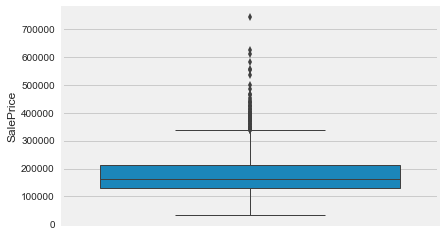

In [16]:
plt.style.use('fivethirtyeight')
%matplotlib inline

fig, ax = plt.subplots()
ax = sns.boxplot(y="SalePrice", data=df, linewidth=1)

In [17]:
print df['SalePrice'].describe(percentiles=[.05,.95])

count      1420.000000
mean     180193.110563
std       78033.304035
min       34900.000000
5%        87975.000000
50%      163000.000000
95%      325642.800000
max      745000.000000
Name: SalePrice, dtype: float64


In [18]:
# Filtering out the dataset based on the 5th and 95th percentiles found above
df = df[df.SalePrice <= 326100]
df = df[df.SalePrice >= 88000]

In [19]:
df.shape

(1279, 19)

## Visualizations:

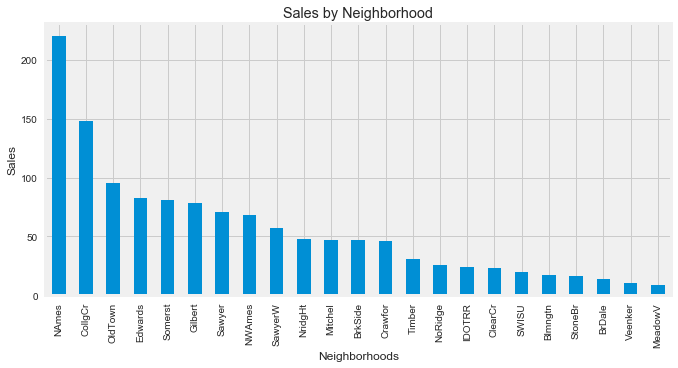

In [20]:
counts=df['Neighborhood'].value_counts().to_frame()
ax=counts.plot(kind='bar',legend=False, figsize=(10,5))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Sales')
ax.set_title('Sales by Neighborhood');

Over the timespan that the dataset covers, it looks like NAmes and CollgCr have had by far the most sales among neighborhoods.

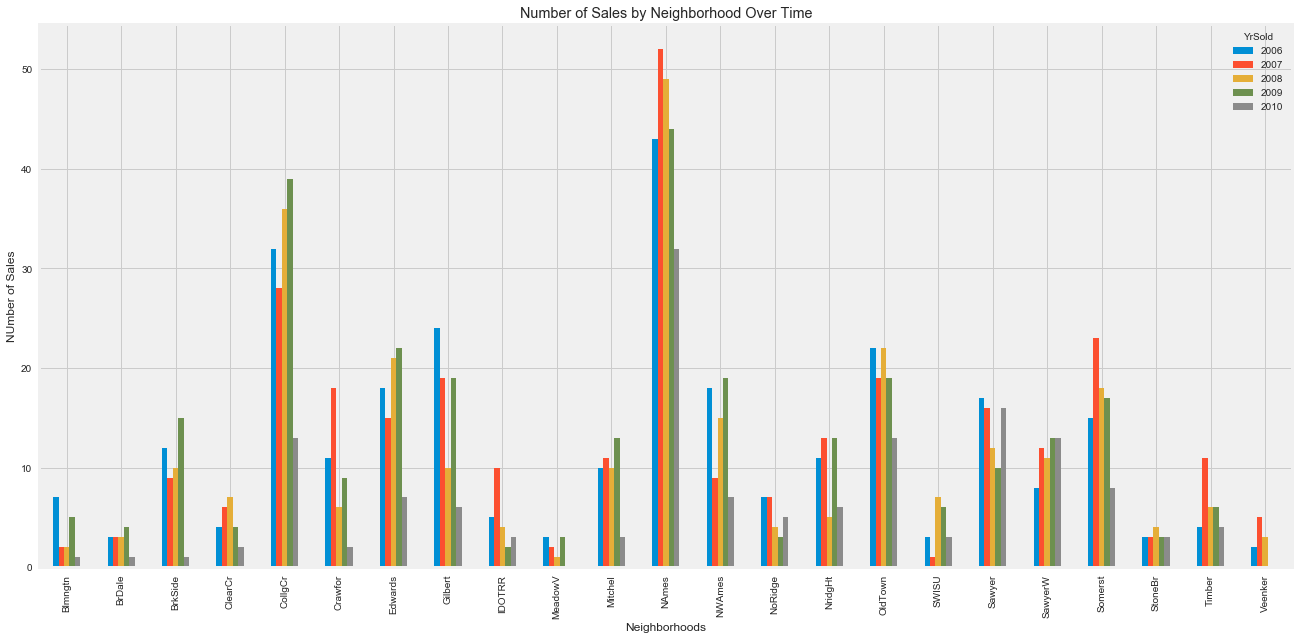

In [21]:
sbnot=pd.pivot_table(df, index=['Neighborhood'],columns=['YrSold'], values='SalePrice', aggfunc='count')

ax=sbnot.plot(kind='bar',legend=True,figsize=(20,10))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('NUmber of Sales')
ax.set_title('Number of Sales by Neighborhood Over Time');

The number of sales fluctuates throughout the years but the neighborhoods generally hover around the same amounts year over year.

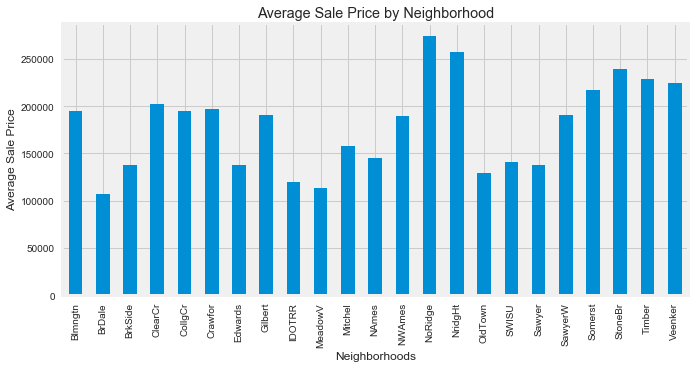

In [22]:
nasp=pd.pivot_table(df, index='Neighborhood', values='SalePrice').to_frame()

ax=nasp.plot(kind='bar',legend=False, figsize=(10,5))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Average Sale Price')
ax.set_title('Average Sale Price by Neighborhood');

The neighborhoods with the highest average sale prices are NoRidge and NridgHt, followed after by StoneBr

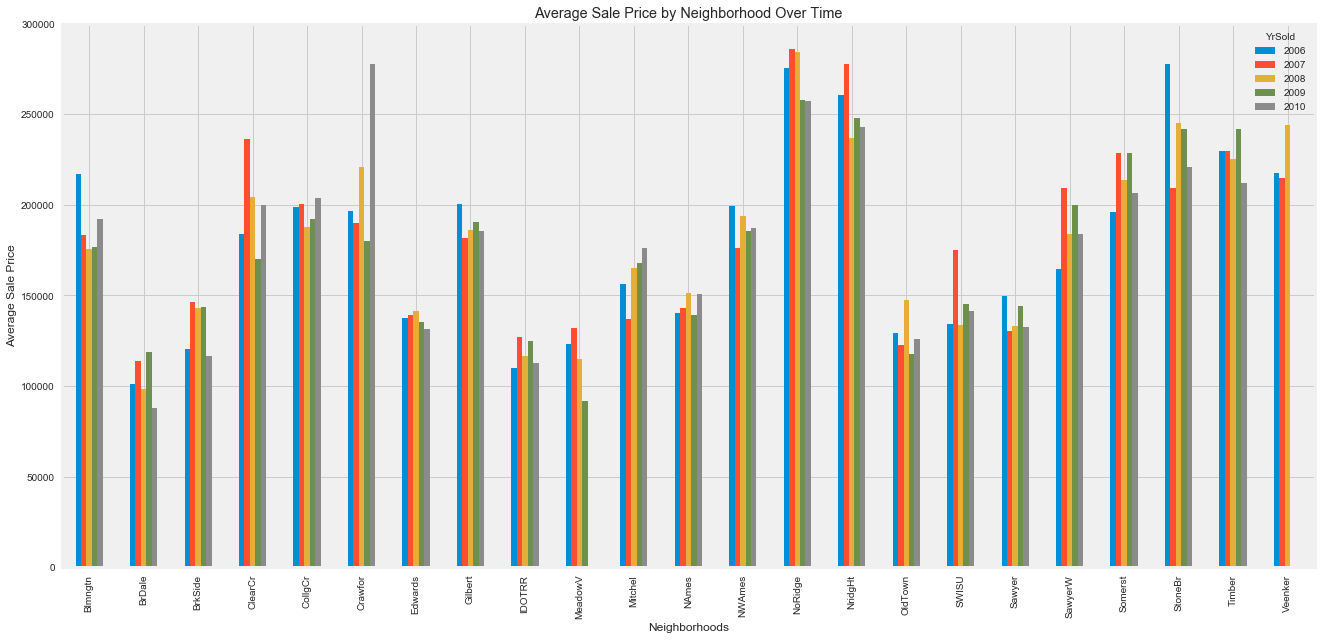

In [23]:
naspot=pd.pivot_table(df, index=['Neighborhood'],columns=['YrSold'], values='SalePrice')

ax=naspot.plot(kind='bar',legend=True,figsize=(20,10))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Average Sale Price')
ax.set_title('Average Sale Price by Neighborhood Over Time');

NoRidge and NridgHt generally maintain their status as the nieghborhoods with the highest sale prices over the timespan. However Crawfor saw a spike in sale price in 2010 and StoneBr had their highest average sale price in 2006.

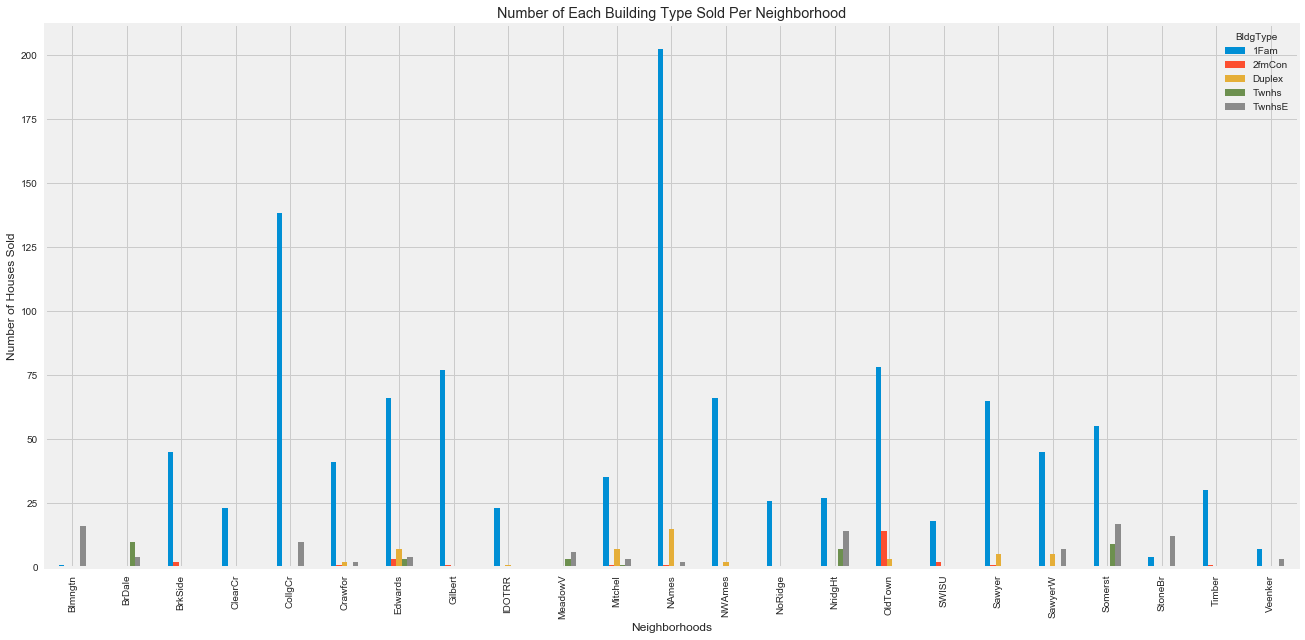

In [24]:
naspot=pd.pivot_table(df, index=['Neighborhood'],columns=['BldgType'], values='SalePrice', aggfunc='count')

ax=naspot.plot(kind='bar',legend=True,figsize=(20,10))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Number of Houses Sold')
ax.set_title('Number of Each Building Type Sold Per Neighborhood');

An overwhelming amount of houses in the area are 1 family homes and the neighborhoods that saw the most sold over our timespan are CollgCr and NAmes.

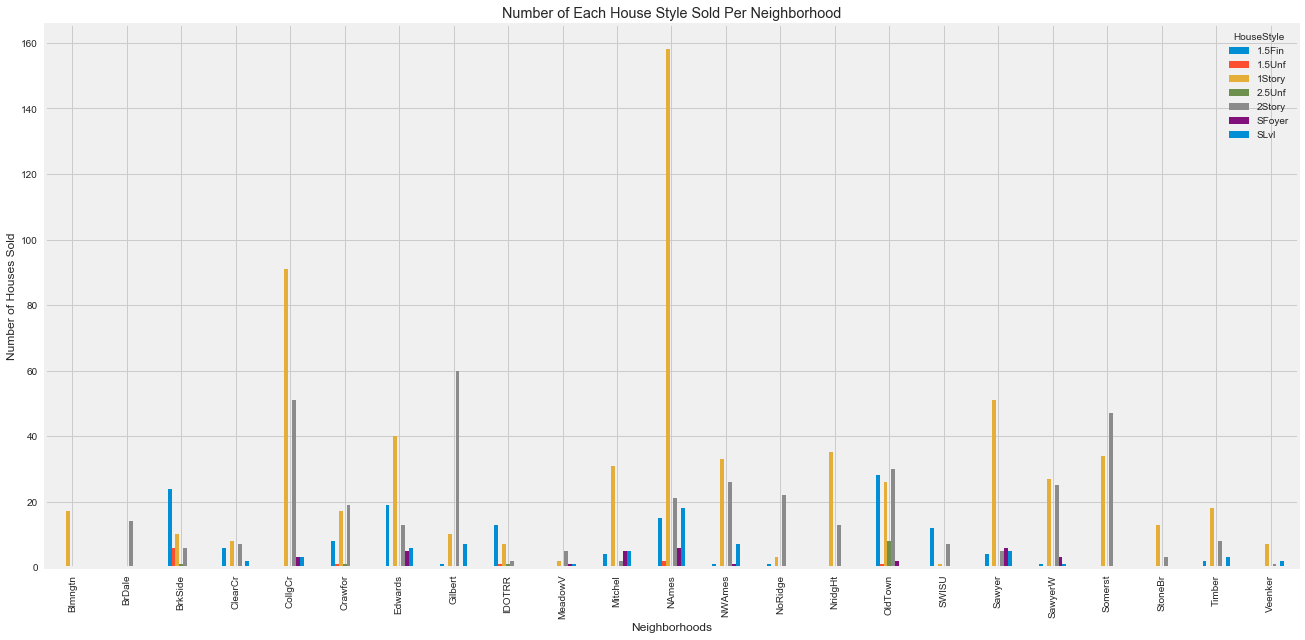

In [25]:
naspot=pd.pivot_table(df, index=['Neighborhood'],columns=['HouseStyle'], values='SalePrice', aggfunc='count')

ax=naspot.plot(kind='bar',legend=True,figsize=(20,10))
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Number of Houses Sold')
ax.set_title('Number of Each House Style Sold Per Neighborhood');

The majority of house styles are either 1 story or 2 stories, with 1 story houses being sold more over the timespan. 

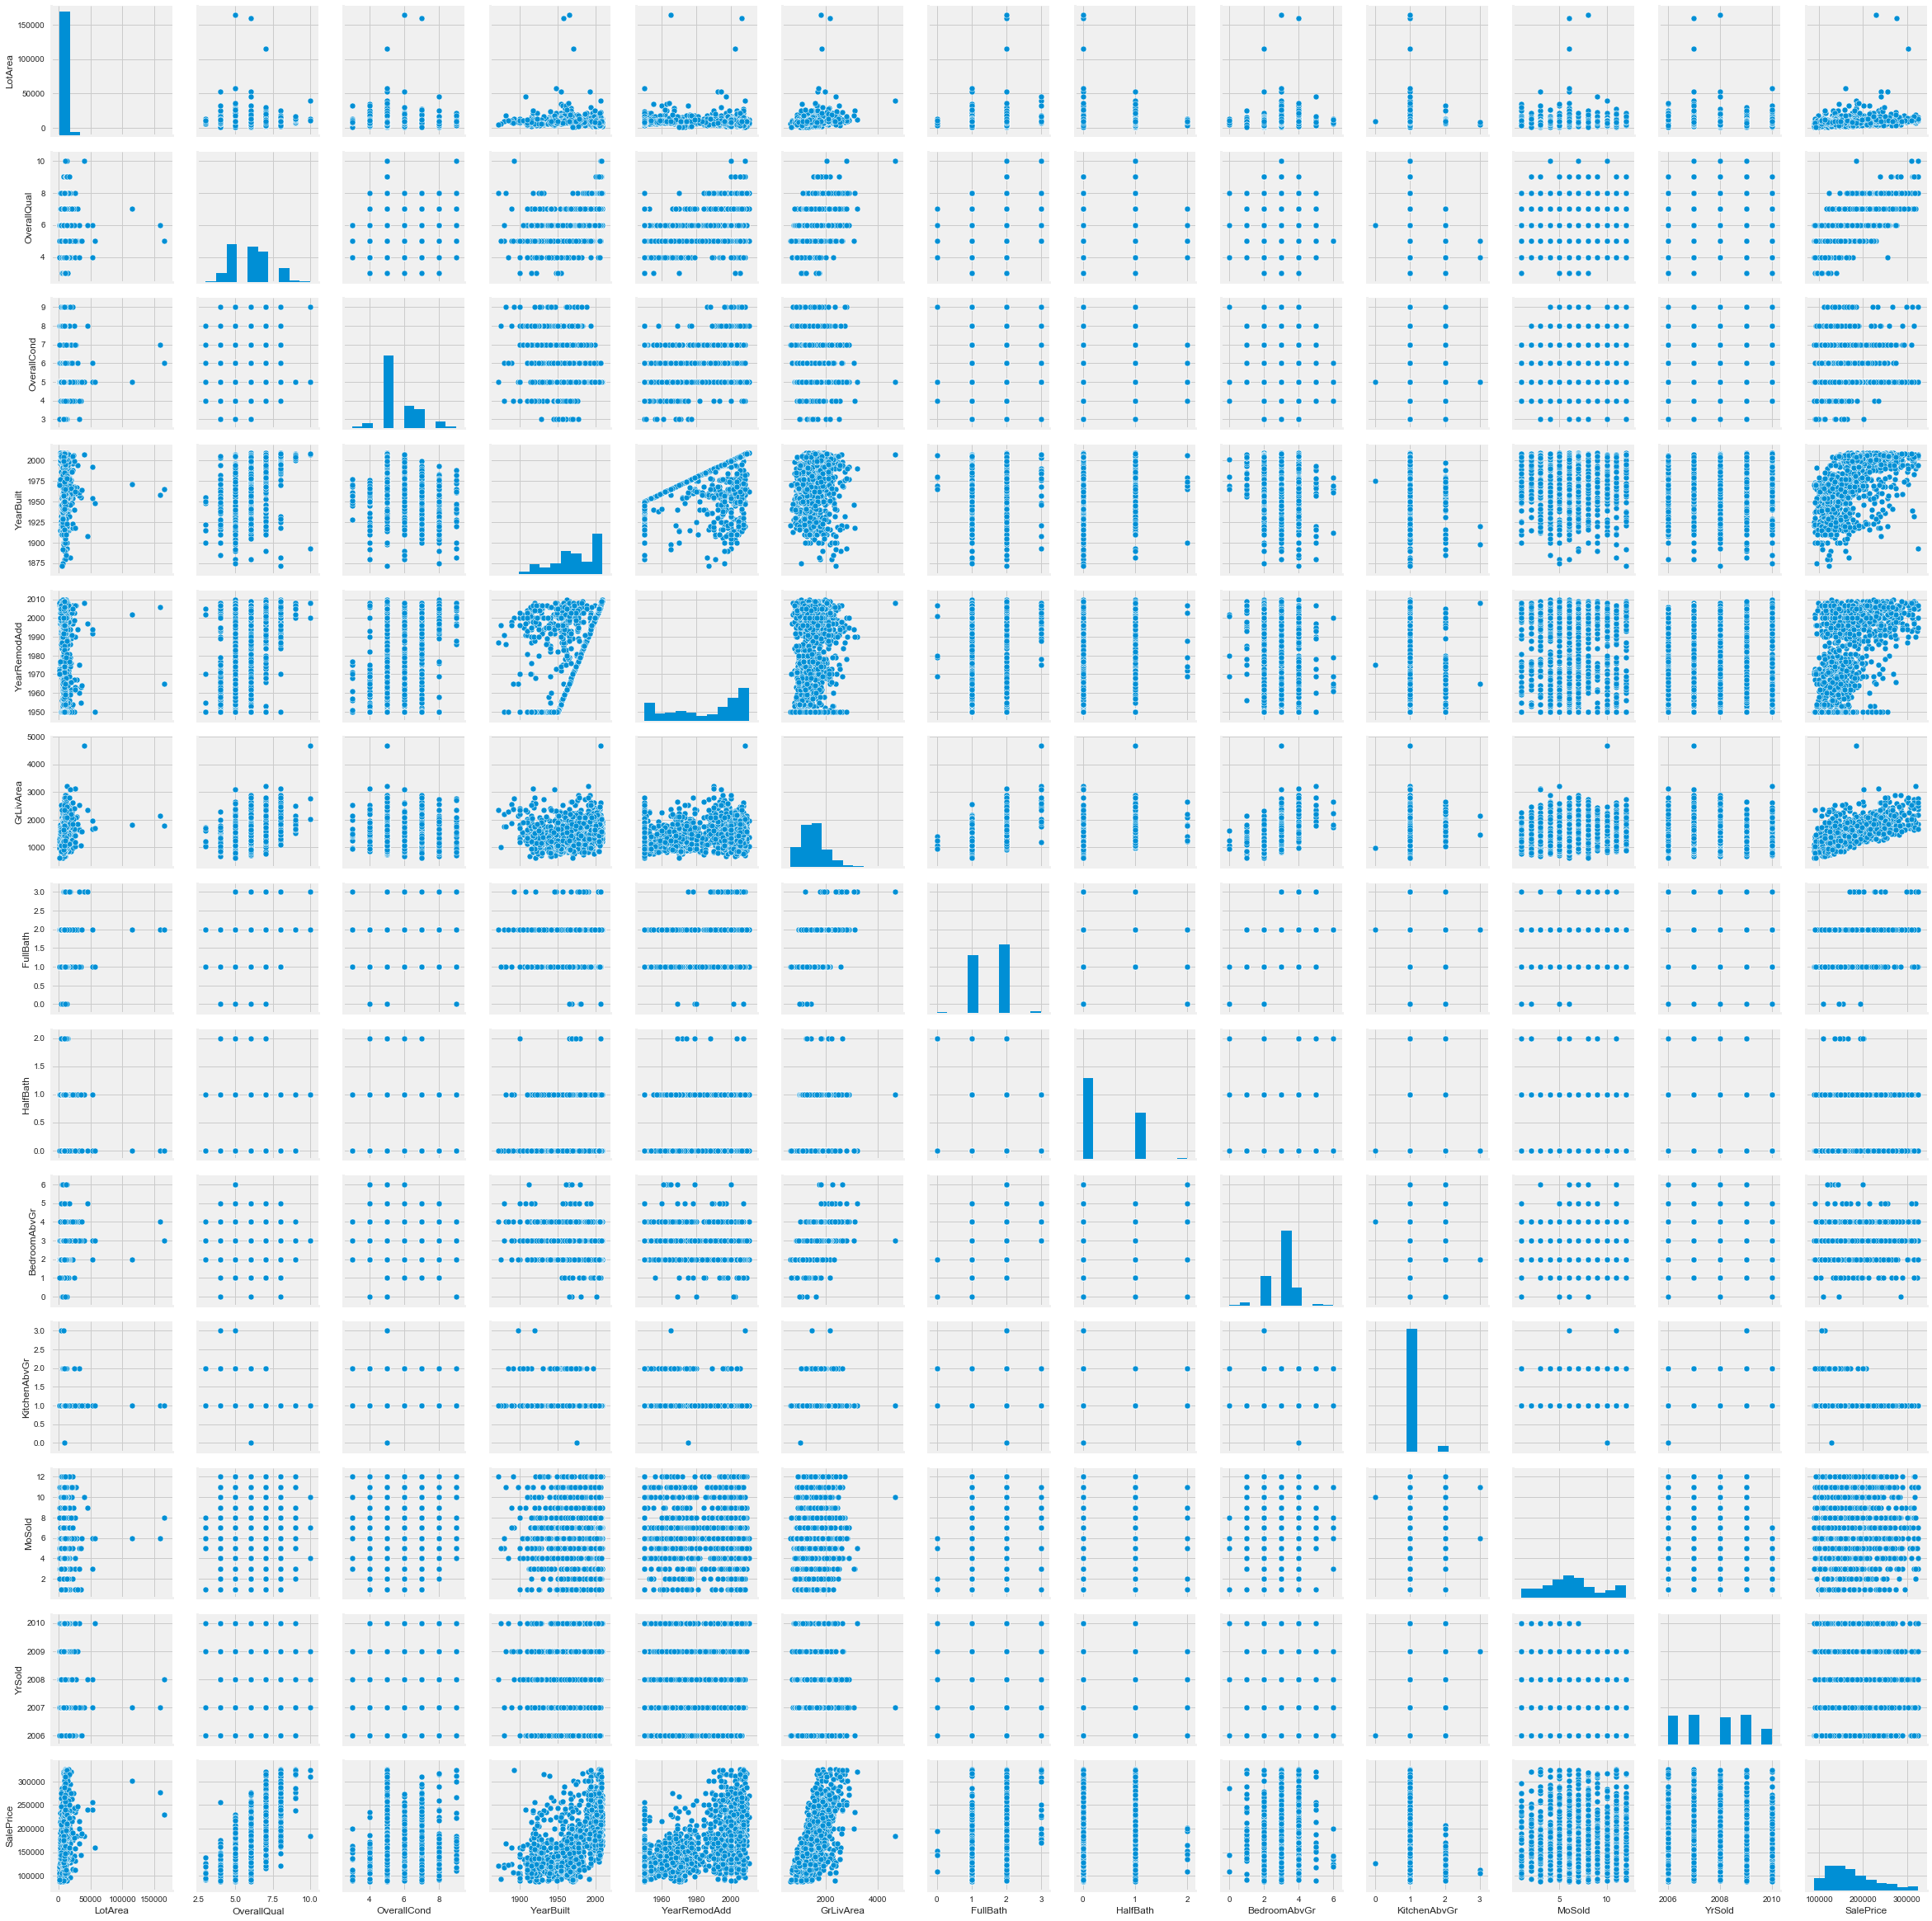

In [26]:
# creating a pairplot in an attempt to observe correlations
sns.pairplot(df)

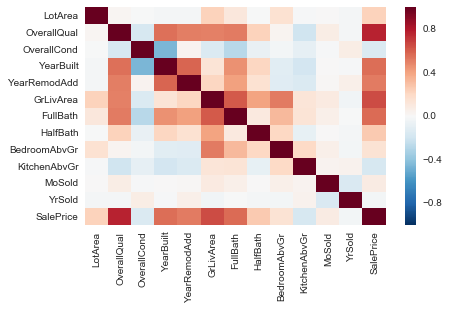

In [27]:
# creating a correlation matrix
corr=df.corr()
sns.heatmap(corr);

The correlation matrix above shows the columns in the dataset and the strength of the correlations between them. Since I am building a model that predicts sale price, I am most interested in the columns that have the strongest correlation with SalePrice. Those categories are OverallQual, YearBuilt, YearRemodAdd, GrLivArea, and FullBath.

Other Correlations:

OverallQual and YearBuit,YearRemodAdd,GrLivArea,FullBath

YearBuilt and FullBath,YearRemodAdd,OverallQual

GrLivArea and FullBath,BedroomAbvGr,HalfBath,OverallQual

## Creating dummy variables for the categorical columns:

In [28]:
df1=pd.concat([df.drop('Utilities',axis=1),pd.get_dummies(df['Utilities'], drop_first=True, prefix='U')], axis = 1)

In [29]:
df1=pd.concat([df1.drop('Neighborhood',axis=1),pd.get_dummies(df['Neighborhood'], drop_first=True, prefix='N')], axis = 1)

In [30]:
df1=pd.concat([df1.drop('BldgType',axis=1),pd.get_dummies(df['BldgType'], drop_first=True, prefix='BT')], axis = 1)

In [31]:
df1=pd.concat([df1.drop('HouseStyle',axis=1),pd.get_dummies(df['HouseStyle'], drop_first=True, prefix='HS')], axis = 1)

In [32]:
df1=pd.concat([df1.drop('RoofStyle',axis=1),pd.get_dummies(df['RoofStyle'], drop_first=True, prefix='RS')], axis = 1)

In [33]:
df1=pd.concat([df1.drop('RoofMatl',axis=1),pd.get_dummies(df['RoofMatl'], drop_first=True, prefix='RM')], axis = 1)
df1.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice,N_BrDale,N_BrkSide,N_ClearCr,N_CollgCr,N_Crawfor,N_Edwards,N_Gilbert,N_IDOTRR,N_MeadowV,N_Mitchel,N_NAmes,N_NWAmes,N_NoRidge,N_NridgHt,N_OldTown,N_SWISU,N_Sawyer,N_SawyerW,N_Somerst,N_StoneBr,N_Timber,N_Veenker,BT_2fmCon,BT_Duplex,BT_Twnhs,BT_TwnhsE,HS_1.5Unf,HS_1Story,HS_2.5Unf,HS_2Story,HS_SFoyer,HS_SLvl,RS_Gable,RS_Gambrel,RS_Hip,RM_Tar&Grv
0,8450,7,5,2003,2003,1710,2,1,3,1,2,2008,208500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,9600,6,8,1976,1976,1262,2,0,3,1,5,2007,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,11250,7,5,2001,2002,1786,2,1,3,1,9,2008,223500,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,9550,7,5,1915,1970,1717,1,0,3,1,2,2006,140000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,14260,8,5,2000,2000,2198,2,1,4,1,12,2008,250000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [34]:
# Moving SalePrice to the front so that it's easier to call
SP = df1['SalePrice']
df1.drop(labels=['SalePrice'], axis=1,inplace = True)
df1.insert(0, 'SalePrice', SP)
df1.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,N_BrDale,N_BrkSide,N_ClearCr,N_CollgCr,N_Crawfor,N_Edwards,N_Gilbert,N_IDOTRR,N_MeadowV,N_Mitchel,N_NAmes,N_NWAmes,N_NoRidge,N_NridgHt,N_OldTown,N_SWISU,N_Sawyer,N_SawyerW,N_Somerst,N_StoneBr,N_Timber,N_Veenker,BT_2fmCon,BT_Duplex,BT_Twnhs,BT_TwnhsE,HS_1.5Unf,HS_1Story,HS_2.5Unf,HS_2Story,HS_SFoyer,HS_SLvl,RS_Gable,RS_Gambrel,RS_Hip,RM_Tar&Grv
0,208500,8450,7,5,2003,2003,1710,2,1,3,1,2,2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,181500,9600,6,8,1976,1976,1262,2,0,3,1,5,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,223500,11250,7,5,2001,2002,1786,2,1,3,1,9,2008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,140000,9550,7,5,1915,1970,1717,1,0,3,1,2,2006,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,250000,14260,8,5,2000,2000,2198,2,1,4,1,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


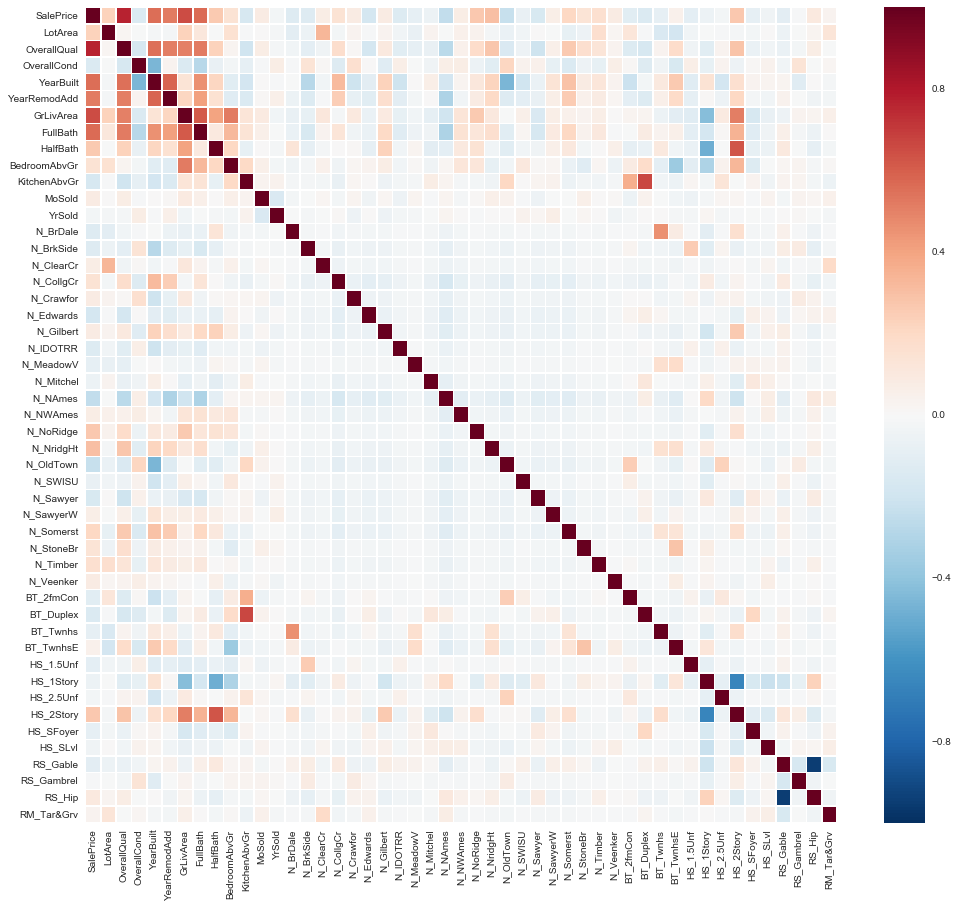

In [35]:
# creating a correlation matrix with all of the dummy variables included
corr=df1.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr,linewidths=.5, ax=ax);

Even with all of the dummy variables included in the correlation matrix, the strongest correlations are still the same as with the first correlation matrix created above.

## Linear Regression with all variables:

In [36]:
target=df1['SalePrice']
dfs = df1.iloc[:,1:]
dfs['intercepts']=1

In [37]:
# Fitting the model

from sklearn import linear_model

X=dfs
y=target

lr = linear_model.LinearRegression()
lr_model = lr.fit(X, y)

In [38]:
from sklearn.metrics import r2_score

# Making predictions
y_true = y
y_pred = lr_model.predict(X)

#getting r2 value for the model
lr_r2 =  r2_score(y_true, y_pred)
lr_r2

0.84650184652854421

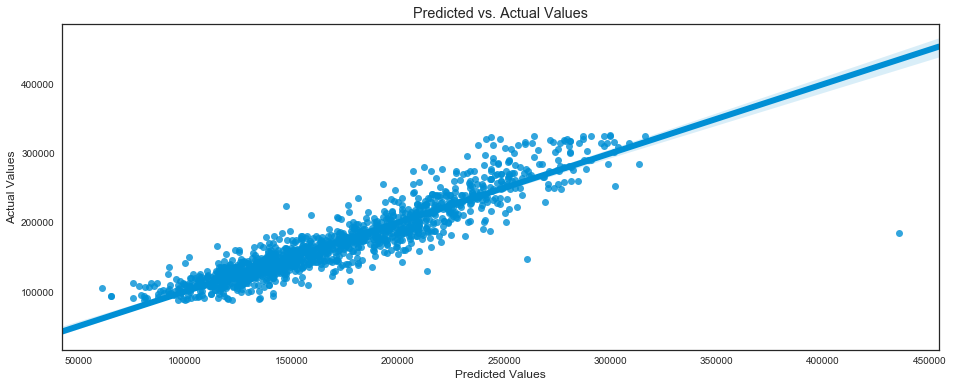

In [39]:
# Plotting predicted values against the actual values
plt.style.use('seaborn-white')
%matplotlib inline

ax = sns.regplot(y_pred, y_true)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values');

In [40]:
# Mean absolute value of coefficients
abs(lr_model.coef_).mean()

10526.335806352859

In [41]:
# Getting the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred) 

452932488.52899015

## Linear Regression with variables chosen from correlation matrix:
I chose the variables that had the strongest correlations to the sale price in the correlation matrix and will build a model with only those variables.

In [51]:
target2=df1['SalePrice']
dfs2 = df1[['OverallQual','YearBuilt','YearRemodAdd','GrLivArea','FullBath']]
dfs2.head()

,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath
0,7,2003,2003,1710,2
1,6,1976,1976,1262,2
2,7,2001,2002,1786,2
3,7,1915,1970,1717,1
4,8,2000,2000,2198,2


In [52]:
# Fitting the model
X2=dfs2
y2=target2

lr2 = linear_model.LinearRegression()
lr_model2 = lr2.fit(X2, y2)

In [53]:
import pickle

with open('modelpickle','wb') as fp:
    pickle.dump(lr_model2,fp)

In [44]:
# Making predictions and getting the r2 value
y_true2 = y2
y_pred2 = lr_model2.predict(X2)

lr_r2_2 =  r2_score(y_true2, y_pred2)
lr_r2_2

0.74749840428456249

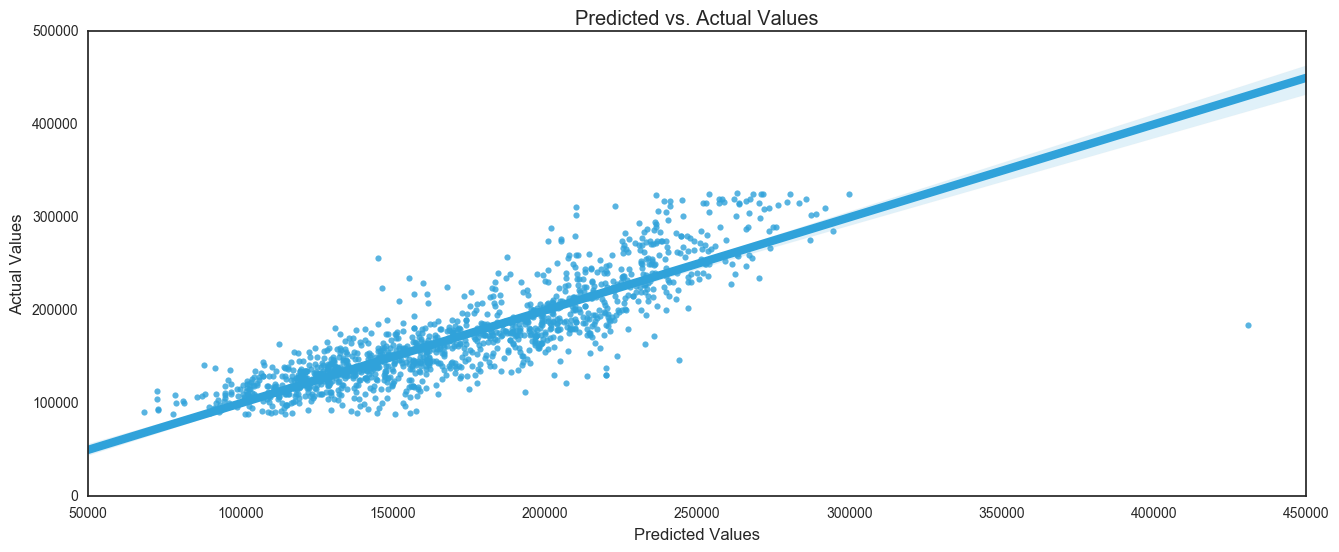

In [45]:
# plotting predicted versus actual values
plt.style.use('seaborn-white')
%matplotlib inline

ax2 = sns.regplot(y_pred2, y_true2)
ax2.figure.set_figheight(6)
ax2.figure.set_figwidth(14)
ax2.set_ylabel('Actual Values')
ax2.set_xlabel('Predicted Values')
ax2.set_title('Predicted vs. Actual Values');

In [46]:
# Mean absolute value of coefficients
abs(lr_model2.coef_).mean()

4163.0549041242512

In [47]:
# Mean squared error
mean_squared_error(y_true2, y_pred2) 

745065484.62292361

## Regularization:

In [48]:
import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Lasso (apha=1)

In [49]:
# Fitting the model
lasso = linear_model.Lasso(alpha=1)
lasso_model = lasso.fit(X, y)

/Users/ct/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
# Making predictions and getting the r2 value
y_true_lasso = y
y_pred_lasso = lasso_model.predict(X)

lasso_r2 =  r2_score(y_true_lasso, y_pred_lasso)
lasso_r2

0.84649645689953479

In [51]:
# Mean absolute value of coefficients
abs(lasso_model.coef_).mean()

10201.996902250483

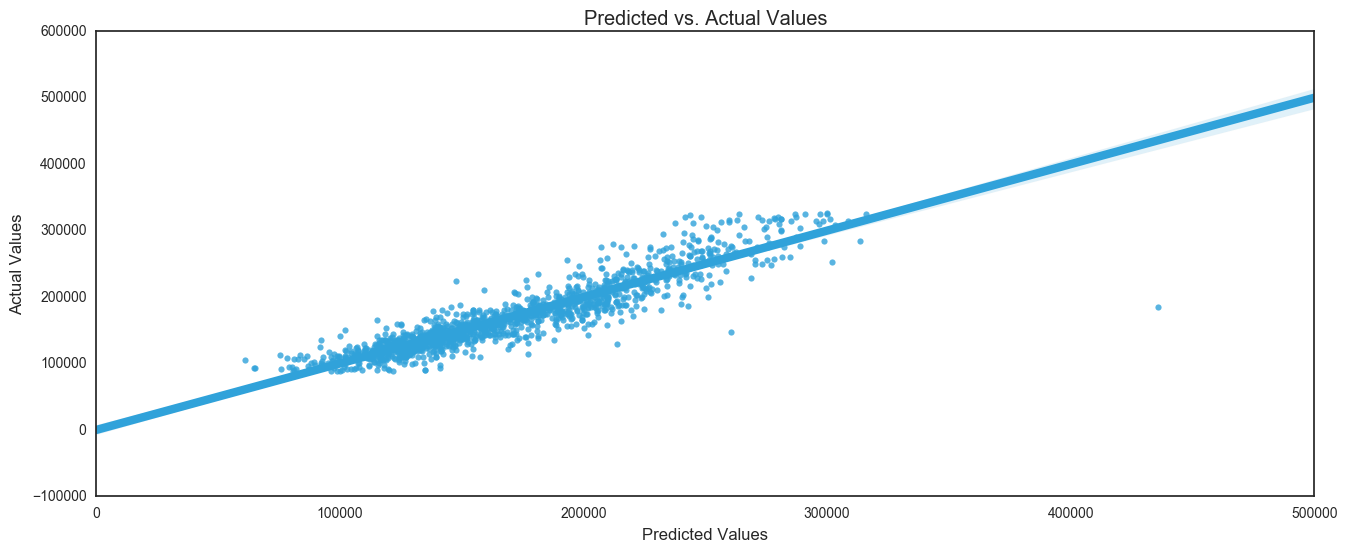

In [52]:
# Plotting predicted versus actual values
plt.style.use('seaborn-white')
%matplotlib inline

ax3 = sns.regplot(y_pred_lasso, y_true_lasso)
ax3.figure.set_figheight(6)
ax3.figure.set_figwidth(14)
ax3.set_ylabel('Actual Values')
ax3.set_xlabel('Predicted Values')
ax3.set_title('Predicted vs. Actual Values');

### Lasso (alpha=40)

In [53]:
# Fitting, Predicting, then getting the r2 value
lasso2 = linear_model.Lasso(alpha=40)
lasso_model2 = lasso2.fit(X, y)

y_true_lasso2 = y
y_pred_lasso2 = lasso_model2.predict(X)

lasso_r2_2 =  r2_score(y_true_lasso2, y_pred_lasso2)
lasso_r2_2

0.84519948602435968

In [54]:
# Mean absolute value of coefficients
abs(lasso_model2.coef_).mean()

7181.5194221538322

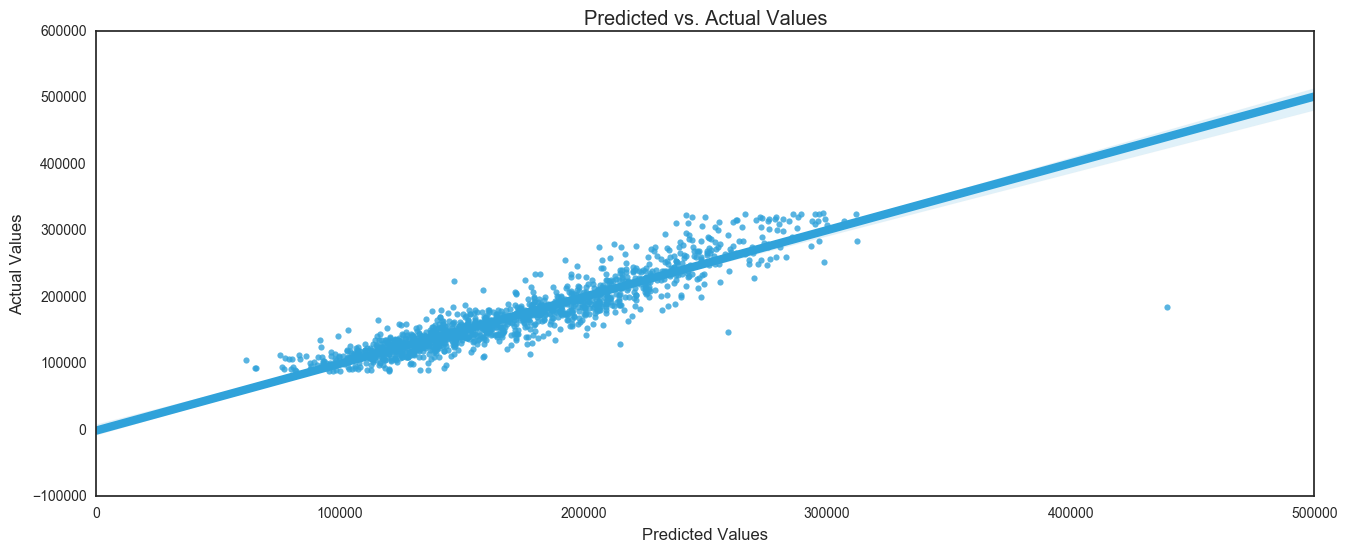

In [55]:
# Plotting predicted versus actual values
plt.style.use('seaborn-white')
%matplotlib inline

ax4 = sns.regplot(y_pred_lasso2, y_true_lasso2)
ax4.figure.set_figheight(6)
ax4.figure.set_figwidth(14)
ax4.set_ylabel('Actual Values')
ax4.set_xlabel('Predicted Values')
ax4.set_title('Predicted vs. Actual Values');

### Ridge

In [56]:
# Fitting the model
ridge = linear_model.Ridge(alpha=1)
ridge_model = ridge.fit(X, y)

In [57]:
# Making predictions and getting the r2 value
y_true_ridge = y
y_pred_ridge = ridge_model.predict(X)

ridge_r2 =  r2_score(y_true_ridge, y_pred_ridge)
ridge_r2

0.84630270382885886

In [58]:
# Mean absolute value of coefficients
abs(ridge_model.coef_).mean()

9029.1306887332503

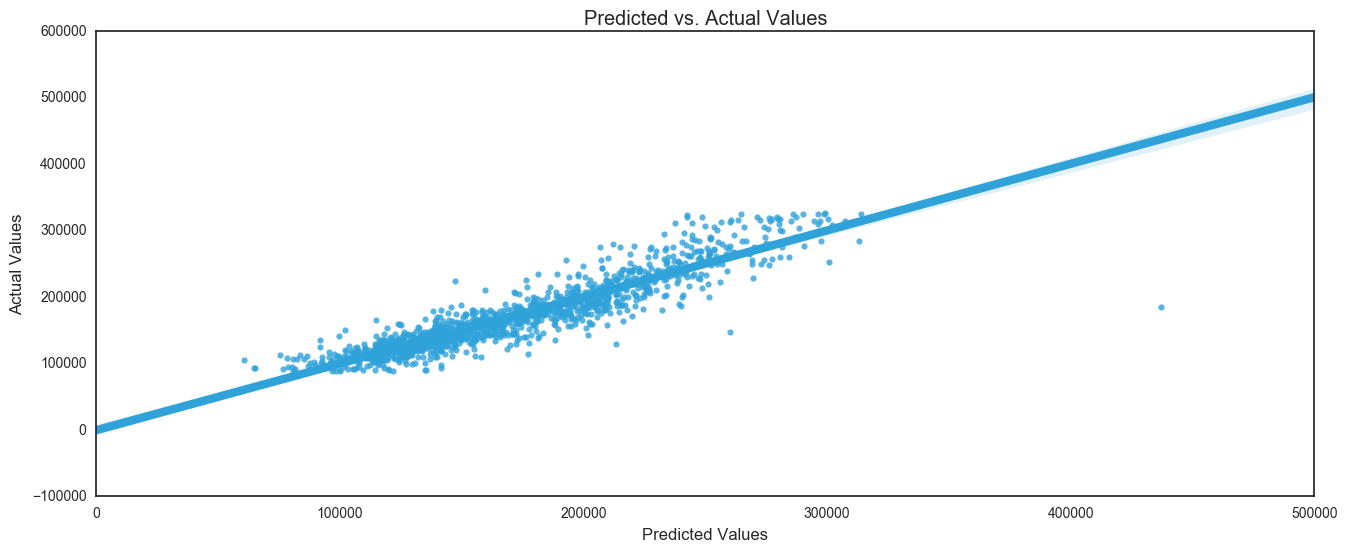

In [59]:
# Plotting predicted versus actual values
plt.style.use('seaborn-white')
%matplotlib inline

ax5 = sns.regplot(y_pred_ridge, y_true_ridge)
ax5.figure.set_figheight(6)
ax5.figure.set_figwidth(14)
ax5.set_ylabel('Actual Values')
ax5.set_xlabel('Predicted Values')
ax5.set_title('Predicted vs. Actual Values');

## Cross Validation:
cross validation was performed using the k-fold method via cross_val_score

In [60]:
# Cross validation score for linear regression model with all variables
cross_val_score(lr, X, y, n_jobs=1, cv=5).mean()

0.82134940143545765

In [61]:
# Cross validation score for linear regression model with selected variables
cross_val_score(lr2, X2, y2, n_jobs=1, cv=5).mean()

0.74448191953346798

In [62]:
# Cross validation score for lasso regression model with alpha=1
cross_val_score(lasso, X, y, n_jobs=1, cv=5).mean()

0.82183173644459107

In [63]:
# Cross validation score for lasso regression model with alpha=40
cross_val_score(lasso2, X, y, n_jobs=1, cv=5).mean()

0.82743653053768917

In [64]:
# Cross validation score for ridge regression model
cross_val_score(ridge, X, y, n_jobs=1, cv=5).mean()

0.82556721461982152

The cross validations scores for the models that I created seem to indicate that the best model that I created for this dataset is the lasso regression model an alpha of 40.